---------------------------------------------------Import Libraries--------------------------------------------------------------------------------------

Libraries and Modules used : 

pandas (pd): For data manipulation and analysis with DataFrames.
numpy (np): For numerical operations and handling arrays.
matplotlib.pyplot (plt): For creating static visualizations and plots.
seaborn (sns): For advanced statistical graphics with improved aesthetics.
sklearn.preprocessing (StandardScaler, PolynomialFeatures):
StandardScaler: Standardizes features (mean = 0, variance = 1).
PolynomialFeatures: Creates polynomial and interaction features.
imblearn.over_sampling (SMOTE, RandomOverSampler):
SMOTE: Generates synthetic samples to balance class distribution.
RandomOverSampler: Duplicates minority class samples.
imblearn.under_sampling (RandomUnderSampler): Randomly removes majority class samples to balance the dataset.
sklearn.datasets (load_iris): Loads the Iris dataset for machine learning examples.
sklearn.model_selection (train_test_split): Splits data into training and testing sets.
sklearn.ensemble (RandomForestClassifier): Classifier using multiple decision trees for improved accuracy.
sklearn.metrics (classification_report, confusion_matrix):
classification_report: Provides precision, recall, and f1-score metrics.
confusion_matrix: Shows counts of true/false positives/negatives.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

-----------------------------------------------Load the Iris Dataset(Data Collection)--------------------------------------------------------------------------
First, we load the Iris dataset from a CSV file.
This dataset contains measurements of different species of Iris flowers and is commonly used for classification tasks in machine learning.

pd.read_csv(): This function from the pandas library reads the CSV file from the specified path and loads it into a DataFrame named df.
File Path: The path to the CSV file is specified using a raw string (indicated by the r before the path) to avoid issues with backslashes in Windows file paths.

In [4]:
# Load the Iris dataset from CSV
df = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\Mini Projects\IRIS\IRIS.csv')

---------------------------------------Display Basic Information About the Dataset(Data Inspection)-----------------------------------------------------
Before going into data preprocessing and analysis, it's crucial to understand the structure of the dataset.
 We do this by displaying basic information about the dataset, including the number of entries, column names, data types, and any missing values.

df.info(): This method from the pandas library provides a concise summary of the DataFrame. 
It displays:
The total number of entries (rows) in the dataset.
The number of non-null entries in each column, which helps identify any missing values.
The data types of each column, which is useful for understanding how the data is stored.

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [6]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
# Print column names and data types
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


---------------------------------------------------Data Preprocessing---------------------------------------------------------------------------------

                    Involves Data Cleaning, Feature Scaling and Handling Categorical Data 

In [8]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Basic statistics of numerical columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Unique values in categorical columns:
species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


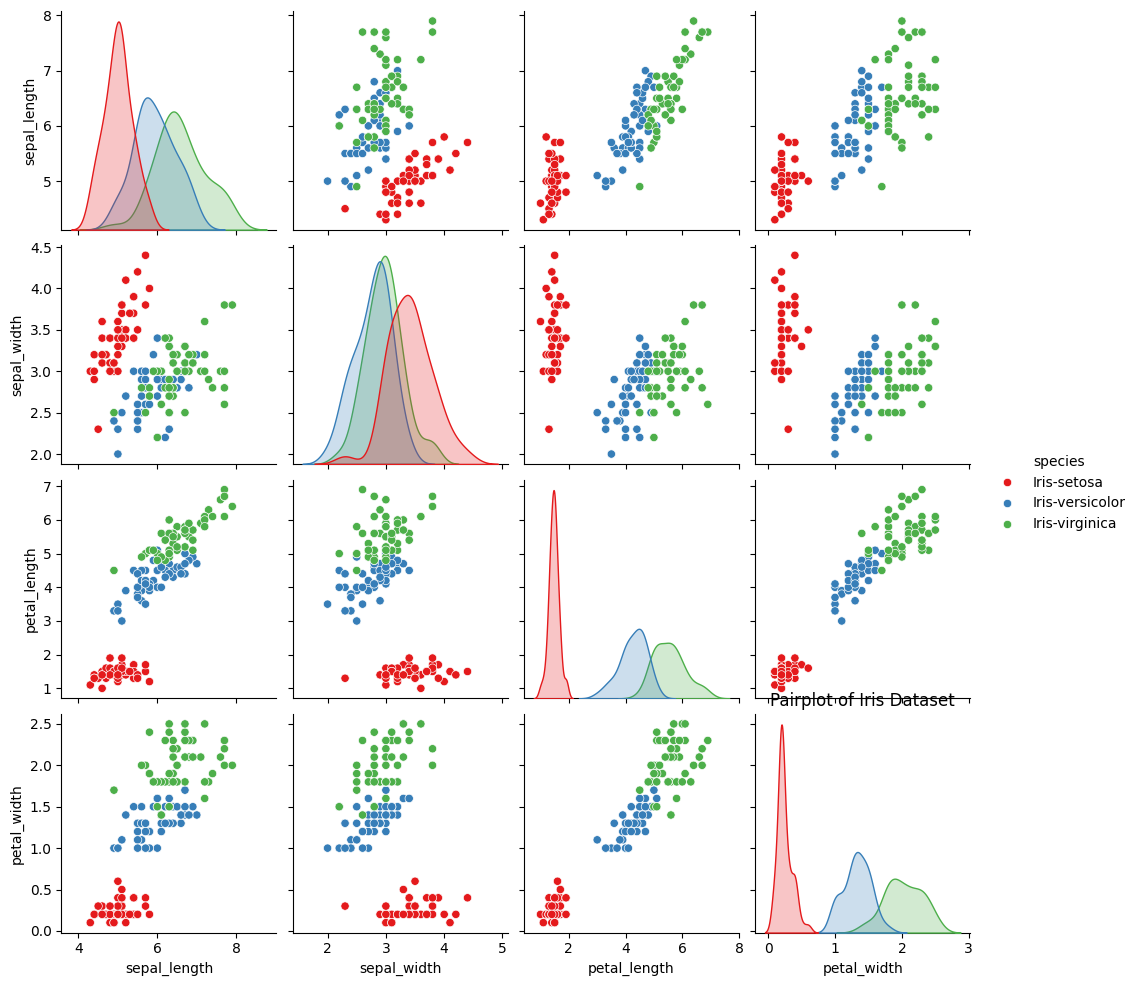

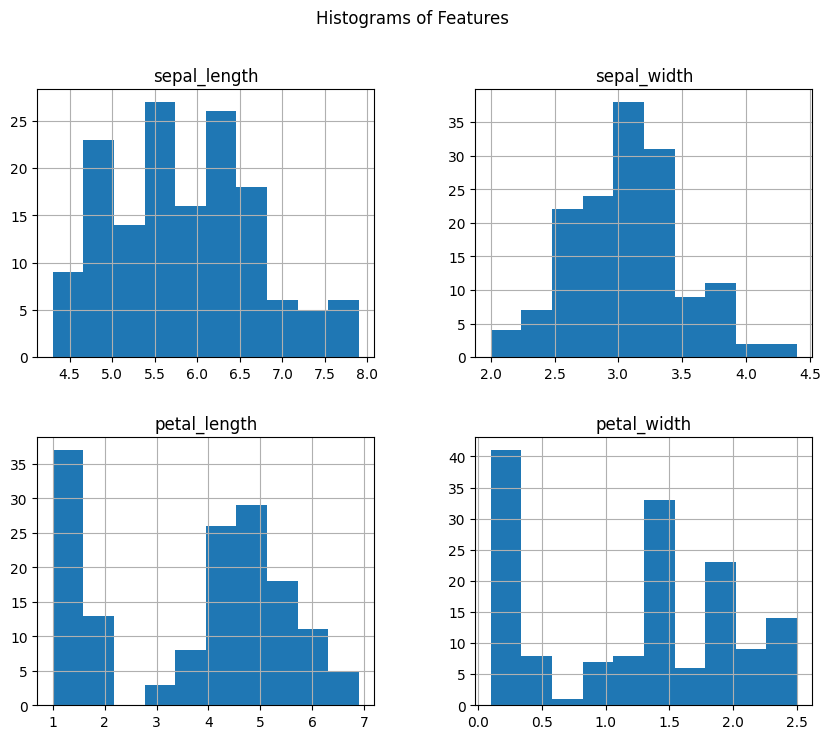

In [9]:
# Check the distribution of classes
if 'species' in df.columns:
    print("\nClass distribution:")
    print(df['species'].value_counts())
else:
    print("Class column 'species' not found in the dataset.")

# Basic statistics for numerical columns
print("\nBasic statistics of numerical columns:")
print(df.describe())

# Check unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', palette='Set1')
plt.title('Pairplot of Iris Dataset')
plt.show()

# Distribution of each feature
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

In [10]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())




Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [11]:
# Display the first few rows of the dataset
print("First few rows of the dataset before scaling:")
print(df.head())

# Print basic statistics before scaling
print("\nBasic statistics before scaling:")
print(df.describe())

First few rows of the dataset before scaling:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Basic statistics before scaling:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.

In [12]:
# Separate features and target
features = df.drop('species', axis=1)
target = df['species']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['species'] = target.values

# Print basic statistics after scaling
print("\nBasic statistics after scaling:")
print(df_scaled.describe())



Basic statistics after scaling:
       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -6.631732e-16  3.315866e-16 -2.842171e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.438987e+00 -1.568735e+00 -1.444450e+00
25%   -9.006812e-01 -5.877635e-01 -1.227541e+00 -1.181504e+00
50%   -5.250608e-02 -1.249576e-01  3.362659e-01  1.332259e-01
75%    6.745011e-01  5.692513e-01  7.627586e-01  7.905908e-01
max    2.492019e+00  3.114684e+00  1.786341e+00  1.710902e+00


In [13]:
# Display the first few rows of the dataset after scaling
print("\nFirst few rows of the dataset after scaling:")
print(df_scaled.head())



First few rows of the dataset after scaling:
   sepal_length  sepal_width  petal_length  petal_width      species
0     -0.900681     1.032057     -1.341272    -1.312977  Iris-setosa
1     -1.143017    -0.124958     -1.341272    -1.312977  Iris-setosa
2     -1.385353     0.337848     -1.398138    -1.312977  Iris-setosa
3     -1.506521     0.106445     -1.284407    -1.312977  Iris-setosa
4     -1.021849     1.263460     -1.341272    -1.312977  Iris-setosa


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
features = df.drop('species', axis=1)
target = df['species']

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['species'] = target.values

# Print basic statistics after scaling
print("\nBasic statistics after scaling:")
print(df_scaled.describe())

# Display the first few rows of the dataset after scaling
print("\nFirst few rows of the dataset after scaling:")
print(df_scaled.head())


Basic statistics after scaling:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       0.428704     0.439167      0.467571     0.457778
std        0.230018     0.180664      0.299054     0.317984
min        0.000000     0.000000      0.000000     0.000000
25%        0.222222     0.333333      0.101695     0.083333
50%        0.416667     0.416667      0.567797     0.500000
75%        0.583333     0.541667      0.694915     0.708333
max        1.000000     1.000000      1.000000     1.000000

First few rows of the dataset after scaling:
   sepal_length  sepal_width  petal_length  petal_width      species
0      0.222222     0.625000      0.067797     0.041667  Iris-setosa
1      0.166667     0.416667      0.067797     0.041667  Iris-setosa
2      0.111111     0.500000      0.050847     0.041667  Iris-setosa
3      0.083333     0.458333      0.084746     0.041667  Iris-setosa
4      0.194444     0.666667      0.

In [15]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'species' column
df['species_encoded'] = label_encoder.fit_transform(df['species'])

print("First few rows of the dataset with Label Encoding:")
print(df.head())

print("\nLabel encoding mapping:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

First few rows of the dataset with Label Encoding:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  

Label encoding mapping:
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [16]:
# Apply One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=['species'], prefix='species')

print("First few rows of the dataset with One-Hot Encoding:")
print(df_one_hot_encoded.head())

First few rows of the dataset with One-Hot Encoding:
   sepal_length  sepal_width  petal_length  petal_width  species_encoded  \
0           5.1          3.5           1.4          0.2                0   
1           4.9          3.0           1.4          0.2                0   
2           4.7          3.2           1.3          0.2                0   
3           4.6          3.1           1.5          0.2                0   
4           5.0          3.6           1.4          0.2                0   

   species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica  
0                 True                    False                   False  
1                 True                    False                   False  
2                 True                    False                   False  
3                 True                    False                   False  
4                 True                    False                   False  


----------------------------------------------------Feature Engineering--------------------------------------------------------------------------------

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Separate features and target
features = df.drop('species', axis=1)
target = df['species']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features)

# Convert polynomial features to DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features.columns))

# Combine polynomial features with original dataset
df_poly = pd.concat([df, poly_features_df], axis=1)

print("First few rows of the dataset with Polynomial Features:")
print(df_poly.head())

First few rows of the dataset with Polynomial Features:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  sepal_length  sepal_width  petal_length  petal_width  ...  \
0                0           5.1          3.5           1.4          0.2  ...   
1                0           4.9          3.0           1.4          0.2  ...   
2                0           4.7          3.2           1.3          0.2  ...   
3                0           4.6          3.1           1.5          0.2  ...   
4                0           5.0          3.6           1.4          0.2  ...   

   sepal_width^2  sepal_

In [18]:
# Feature Ratios
if 'sepal length (cm)' in df.columns and 'sepal width (cm)' in df.columns:
    df['sepal_length_width_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
if 'petal length (cm)' in df.columns and 'petal width (cm)' in df.columns:
    df['petal_length_width_ratio'] = df['petal length (cm)'] / df['petal width (cm)']

print("\nFirst few rows of the dataset with Feature Ratios:")
print(df.head())


First few rows of the dataset with Feature Ratios:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [19]:
#Feature Transformations
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check column names
print("Column names in the DataFrame:")
print(df.columns)

# Apply feature transformations if columns exist
if 'sepal length (cm)' in df.columns:
    df['sepal_length_squared'] = df['sepal length (cm)'] ** 2

if 'petal length (cm)' in df.columns:
    df['petal_length_log'] = df['petal length (cm)'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)

print("\nFirst few rows of the dataset with Feature Transformations:")
print(df.head())

Column names in the DataFrame:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_encoded'],
      dtype='object')

First few rows of the dataset with Feature Transformations:
   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [20]:
#Handling Imbalanced Data 
from sklearn.utils import shuffle

# Simulate class imbalance
df_imbalanced = df.copy()
df_imbalanced = pd.concat([df_imbalanced[df_imbalanced['species'] == 'setosa']] * 50 +
                          [df_imbalanced[df_imbalanced['species'] == 'versicolor']] * 10 +
                          [df_imbalanced[df_imbalanced['species'] == 'virginica']] * 5)

# Shuffle the dataset
df_imbalanced = shuffle(df_imbalanced)

print("Class distribution in imbalanced dataset:")
print(df_imbalanced['species'].value_counts())


Class distribution in imbalanced dataset:
Series([], Name: count, dtype: int64)


--------------------------------------------------------------Data Transformation-------------------------------------------------------------------------------

In [21]:
# Save the preprocessed dataset to a CSV file
df.to_csv('preprocessed_iris_dataset.csv', index=False)


------------------------------------------------------------Analysis-------------------------------------------------------------------------

NameError: name 'iris' is not defined

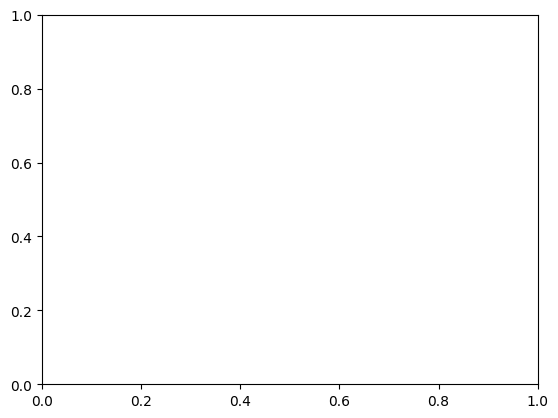

In [22]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

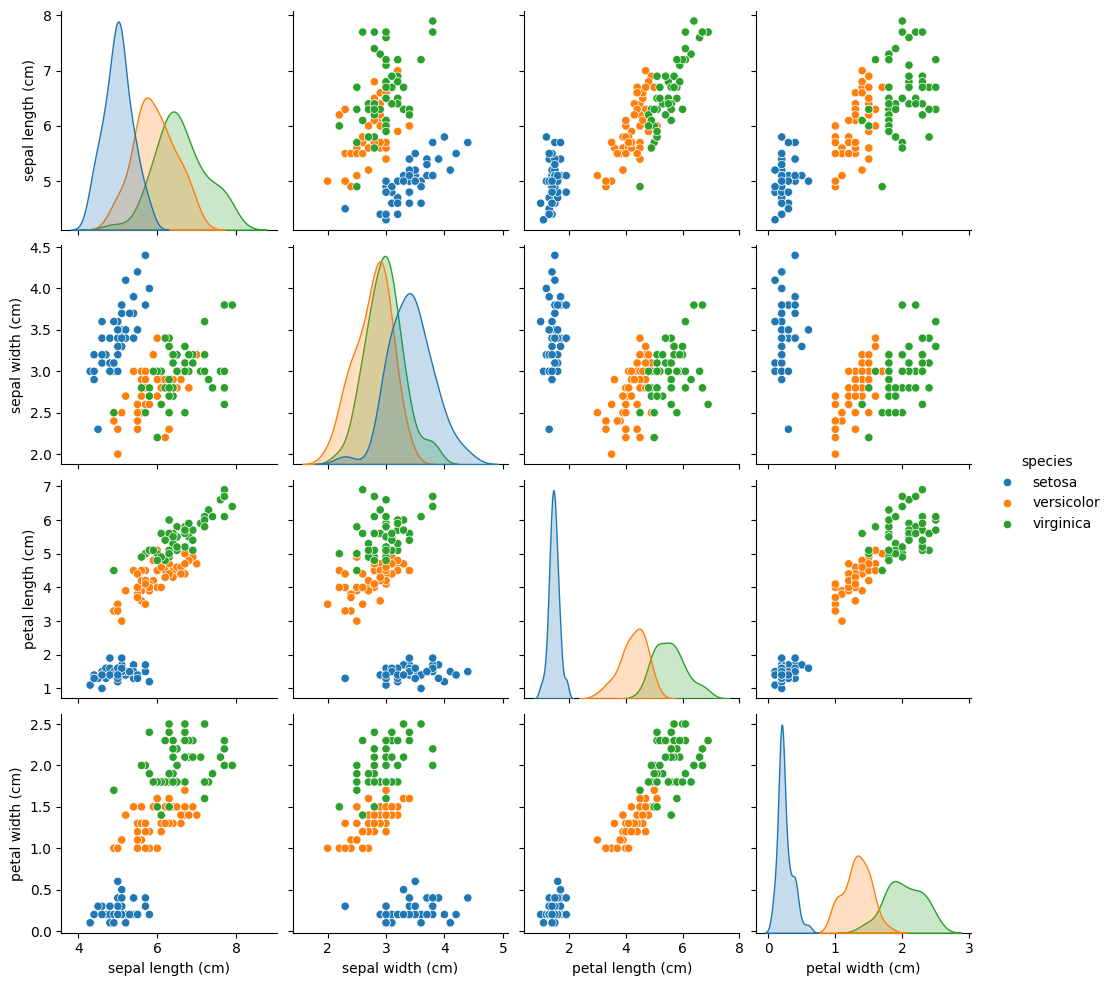

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})

sns.pairplot(df, hue='species')
plt.show()


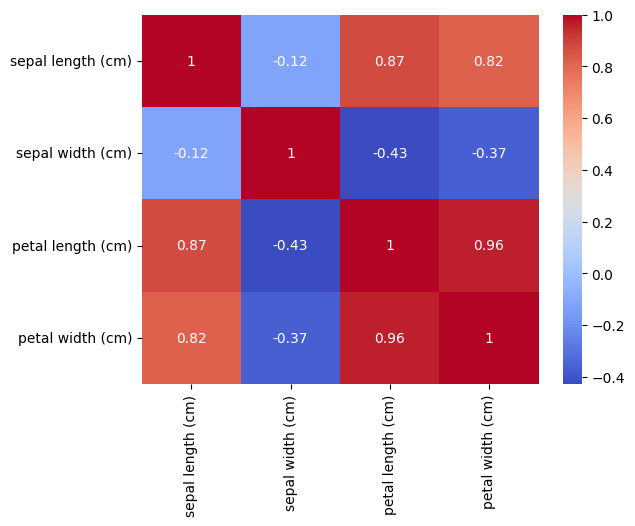

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


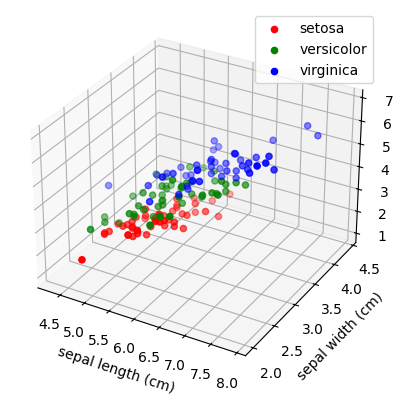

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i, species in enumerate(iris.target_names):
    species_data = df[df['species'] == species]
    ax.scatter(species_data.iloc[:, 0], species_data.iloc[:, 1], species_data.iloc[:, 2], c=colors[i], label=species)

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.legend()
plt.show()


In [23]:
# Summary statistics before scaling
print("Summary statistics before scaling and feature engineering:")
print(df.describe(include='all'))

# Summary statistics after scaling and feature engineering
print("\nSummary statistics after scaling and feature engineering:")
print(df_scaled.describe(include='all'))


Summary statistics before scaling and feature engineering:
        sepal_length  sepal_width  petal_length  petal_width      species  \
count     150.000000   150.000000    150.000000   150.000000          150   
unique           NaN          NaN           NaN          NaN            3   
top              NaN          NaN           NaN          NaN  Iris-setosa   
freq             NaN          NaN           NaN          NaN           50   
mean        5.843333     3.054000      3.758667     1.198667          NaN   
std         0.828066     0.433594      1.764420     0.763161          NaN   
min         4.300000     2.000000      1.000000     0.100000          NaN   
25%         5.100000     2.800000      1.600000     0.300000          NaN   
50%         5.800000     3.000000      4.350000     1.300000          NaN   
75%         6.400000     3.300000      5.100000     1.800000          NaN   
max         7.900000     4.400000      6.900000     2.500000          NaN   

        species_

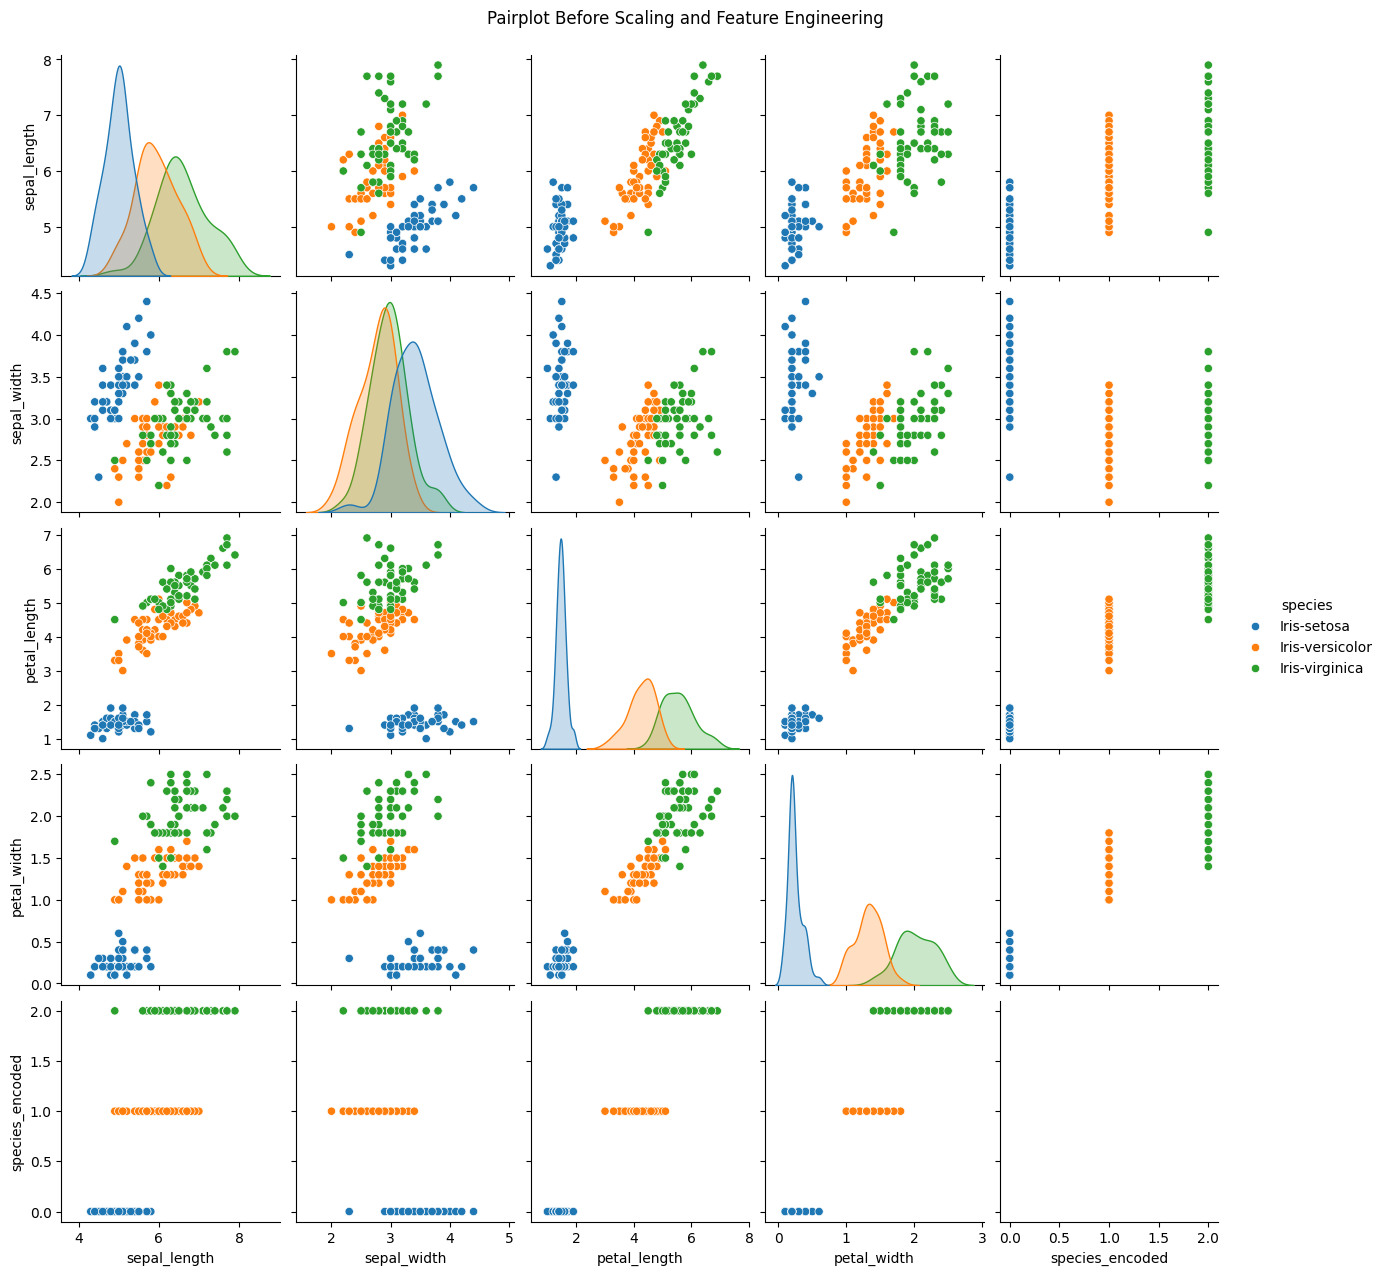

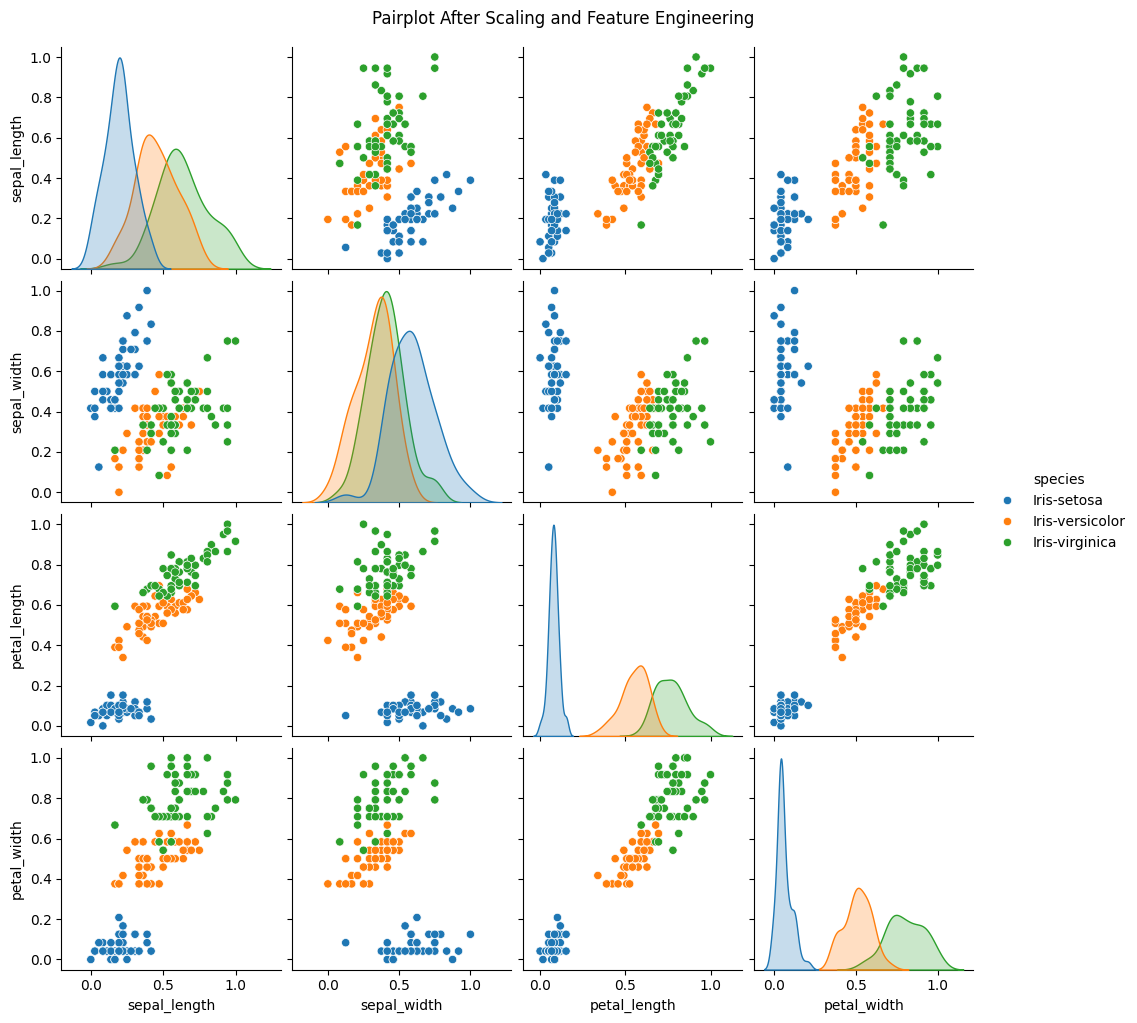

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot before scaling and feature engineering
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot Before Scaling and Feature Engineering', y=1.02)
plt.show()

# Pairplot after scaling and feature engineering
sns.pairplot(df_scaled, hue='species')
plt.suptitle('Pairplot After Scaling and Feature Engineering', y=1.02)
plt.show()


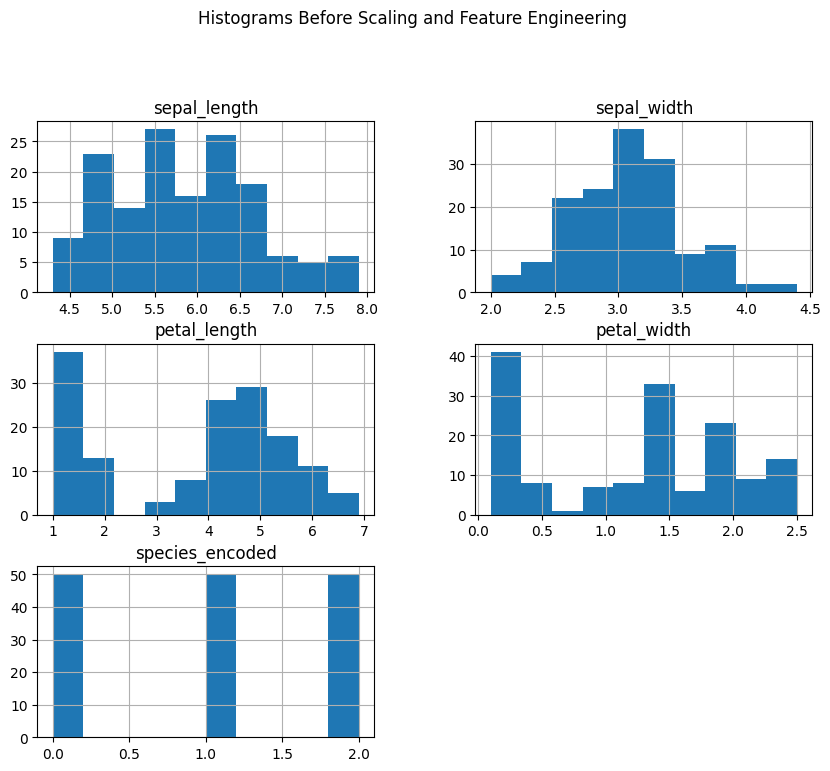

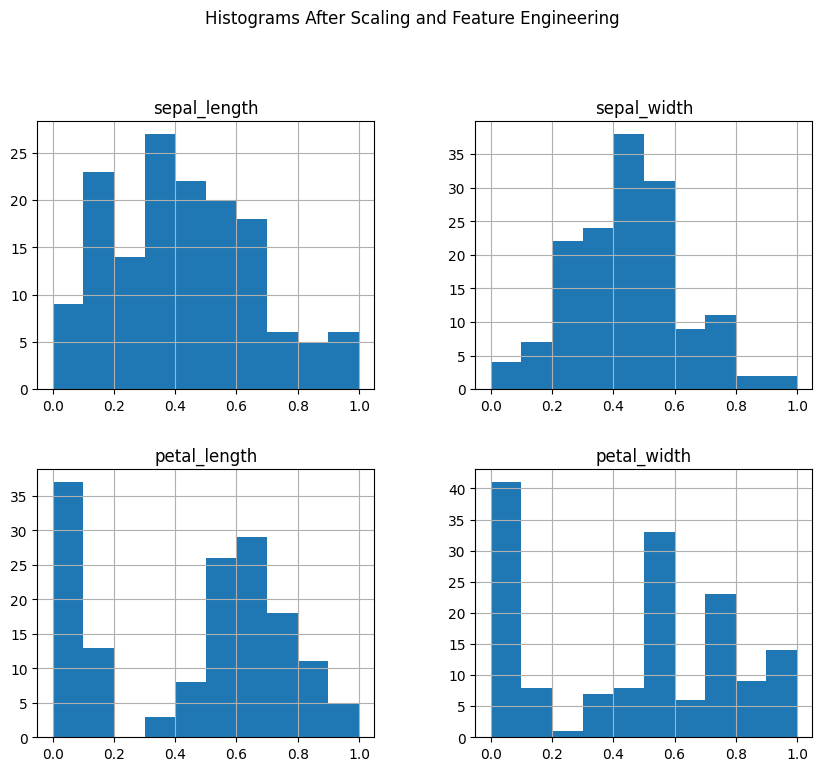

In [25]:
# Histograms before scaling
df.hist(figsize=(10, 8))
plt.suptitle('Histograms Before Scaling and Feature Engineering', y=1.02)
plt.show()

# Histograms after scaling
df_scaled.hist(figsize=(10, 8))
plt.suptitle('Histograms After Scaling and Feature Engineering', y=1.02)
plt.show()
